## HW2. Вариант 45. Галимзянов Дмитрий Сергеевич

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sympy import Matrix, Inverse
from scipy.optimize import linprog

## Задача 1

Решить приближенно систему и оценить погрешности решения в нормах 1, 2 и $\infty$

\begin{cases}
    (4 + \varepsilon_1)x + 2(-4+\varepsilon_2)y = -5 + \varepsilon_3 \\
    2x + (-2+\varepsilon_1)y = -1 + \varepsilon_4 
\end{cases}

где неизвестные числа $ε_j$ удовлетворяют условиям $|ε_j | < 0.05$ для всех $j = 1, . . . , 4.$

## Решение

Запишем
$$A = \begin{pmatrix}
4 & -8\\
2 & -2
      \end{pmatrix},\,\,\,\, \Delta = \begin{pmatrix}
      \varepsilon_1 & 2\varepsilon_2\\
      0& \varepsilon_1
      \end{pmatrix}$$
      
$$b = \begin{pmatrix}
-5\\
-1
\end{pmatrix},\,\,\,\, \eta = \begin{pmatrix}
\varepsilon_3\\
\varepsilon_4
\end{pmatrix}$$

Тогда система запишется в виде
$$(A + \Delta)z = b + \eta$$

Решая систему $Az = b,$ получим решение:

In [ ]:
A = np.array([[4, -8],
              [2, -2]])
b = np.array([-5, -1])

z = np.linalg.solve(A, b)
z

Обозначив через $r$ погрешность решения, воспользуемся оценкой погрешности

$$||r|| \leqslant \frac{\chi(A)(\delta b + \delta A)}{1 - \delta A\chi(A)},$$
где 
$$\delta b = \frac{||\eta||}{||b||},\,\,\,\,\delta A = \frac{||\Delta||}{||A||},\,\,\,\,\chi(A) = ||A||\cdot||A^{-1}||$$

In [ ]:
# бесконечность-норма

A_inv = np.linalg.inv(A)
A_inv_norm = np.linalg.norm(A_inv, ord=np.inf)
chi_A = np.linalg.norm(A, ord=np.inf) * A_inv_norm

eta_norm = 0.05
delta_norm = 0.15
z_norm = np.linalg.norm(z, ord=np.inf)

delta_b = eta_norm / np.linalg.norm(b, ord=np.inf)
delta_A = delta_norm / np.linalg.norm(A, ord=np.inf)

r = chi_A * (delta_b + delta_A) / (1 - delta_A*chi_A)
print(f'Погрешность в бесконечность-норме: {r}')


In [ ]:
# 1-норма

A_inv = np.linalg.inv(A)
A_inv_norm = np.linalg.norm(A_inv, ord=1)
chi_A = np.linalg.norm(A, ord=1) * A_inv_norm

eta_norm = 0.1
delta_norm = 0.15
z_norm = np.linalg.norm(z, ord=1)

delta_b = eta_norm / np.linalg.norm(b, ord=1)
delta_A = delta_norm / np.linalg.norm(A, ord=1)

r = chi_A * (delta_b + delta_A) / (1 - delta_A*chi_A)
print(f'Погрешность в 1-норме: {r}')


In [ ]:
# 2-норма

Delta = np.array([[0.05, 0.1],
                  [0, 0.05]])

A_inv = np.linalg.inv(A)
A_inv_norm = np.linalg.norm(A_inv, ord=2)
chi_A = np.linalg.norm(A, ord=2) * A_inv_norm

eta_norm = np.linalg.norm(np.array([0.05, 0.05]), ord=2)
delta_norm = np.linalg.norm(Delta, ord=2)
z_norm = np.linalg.norm(z, ord=2)

delta_b = eta_norm / np.linalg.norm(b, ord=2)
delta_A = delta_norm / np.linalg.norm(A, ord=2)

r = chi_A * (delta_b + delta_A) / (1 - delta_A*chi_A)
print(f'Погрешность в 2-норме: {r}')


## Задание 2

Решить систему линейных уравнений методом итераций.

\begin{cases}
    22x + 6y + 3z = 5, \\
    6x + 19y + 4z = 2, \\
    2x + 9y + 22z = 4. 
\end{cases}

Определить номер итерации, после которой погрешность приближения по каждой координате не превосходит 0.01 и найти соответствующее приближенное решение. За нулевое приближение принять вектор

$x_0 = [0, 0, 0]^T.$

### Решение

1. Переходим к системе 

\begin{align*}
    x = Px + c
\end{align*}

\begin{cases}
    x = 0x - \frac{6}{22}y - \frac{3}{22}z + \frac{5}{22}, \\
    y = - \frac{6}{19}x + 0y - \frac{4}{19}z + \frac{2}{19}, \\
    z = - \frac{2}{22} - \frac{9}{22}x + 0z + \frac{4}{22}. 
\end{cases}

\begin{align*}
    \begin{pmatrix} 
        x \\
        y \\
        z
    \end{pmatrix} =
    \begin{pmatrix} 
        0 & -\frac{6}{22} & -\frac{3}{22} \\
        -\frac{6}{19} & 0 & -\frac{4}{19} \\
        -\frac{2}{22} & -\frac{9}{22} & 0
    \end{pmatrix} 
    \begin{pmatrix} 
        x \\
        y \\
        z
    \end{pmatrix} +
    \begin{pmatrix} 
        \frac{5}{22} \\
        \frac{2}{19} \\
        \frac{4}{22}
    \end{pmatrix}
\end{align*}

$ $

2. Оценим сходимость метода:

$|| P ||_{\infty} = max(\frac{9}{22}, \frac{10}{19}, \frac{11}{22}) = \frac{10}{19} < 1 $ поэтому метод сойдется

Взяли векторную норму $|| v ||_{\infty} = max(|v_1| ... |v_n|)$ поскольку ограничиваем погрешность по каждой координате

$ $

3. Воспользуемся неравенством для оценки погрешности решения:

$ | \hat{x} - x^k | \leq \frac{||P||^k}{1 - ||P||} | x^1 - x^0 | $

Имеем $x_0 = [0, 0, 0]^T$, тогда 

$x_1 - x_0 = x_1$

$ x_1 = Px_0 + c = c $

То есть $ | \hat{x} - x^k | \leq \frac{||P||^k}{1 - ||P||} | с | $

$ $

4. Определим номер итерации:

$ | с | = \frac{5}{22} , || P ||_{\infty} = \frac{10}{19} $

$ | \hat{x} - x^k | \leq \frac{||P||^k}{1 - ||P||} | с | \leq 0.01 $

$ \frac{(\frac{10}{19})^k}{1 - \frac{10}{19}} \cdot \frac{5}{22} \leq 0.01 $

$ 47.(97) \leq (1.9)^k $

$ k = 7 $

In [ ]:
P = np.array([[0, -6/22, -3/22],
              [-6/19, 0, -4/19],
              [-2/22, -9/22, 0]])

c = np.array([5/22, 2/19, 4/22])

x_0 = np.array([0, 0, 0])

steps = 7

for i in range(steps):
    x_0 = c + np.dot(P, x_0)
    print(f'iter {i+1}: x = {x_0}')
print()
print(f'Ответ: x = {x_0}')

iter 1: x = [0.22727273 0.10526316 0.18181818]
iter 2: x = [ 0.1737712  -0.00478469  0.11809482]
iter 3: x = [0.2124738  0.02552597 0.16797817]
iter 4: x = [0.19740498 0.00280234 0.15205994]
iter 5: x = [0.20577301 0.01091212 0.16272586]
iter 6: x = [0.2021068  0.00602413 0.15864749]
iter 7: x = [0.20399603 0.00804048 0.16098042]

Ответ: x = [0.20399603 0.00804048 0.16098042]


- Проверим правильность решения

In [ ]:
P_orig = np.array([[22, 6, 3],
                   [6, 19, 4],
                   [2, 9, 22]])

b_orig = np.array([5, 2, 4])

x_true = np.linalg.solve(P_orig, b_orig)

np.abs(x_true - x_0)

array([0.00057102, 0.00077531, 0.00062754])

### Ответ

После 7 шага итерации погрешность приближения по каждой координате не превосходит 0.01. Соотвествующее приближенное решение:

$ x^{(7)} = (0.204, 0.008, 0.160) $

## Задание 3

Найти собственные значения методом вращений (метод Якоби) для
матрицы

\begin{align*}
    A =
    \begin{pmatrix} 
        -8 & -3 & 3 \\
        -3 & 6 & -8 \\
        3 & -8 & 6
    \end{pmatrix}
\end{align*}

### Решение

- Итеративный процесс

На каждом шаге находим матрицу $R = R(i, j, \theta)$

Тогда, $A_{k+1} = R^T A_{k} R$

Продолжаем, пока A не станет диагональной

$ $

- Шаг 1

Найдем в матрице A наибольший по модулю недиагональный элемент: $a_{ij} = a_{23} = -8$

Возьмем матрицу $R_1$

\begin{align*}
    R_1 = R(i, j, \theta) =
    \begin{pmatrix} 
        1 & 0 & 0 \\
        0 & cos (\phi) & -sin (\phi) \\
        0 & sin (\phi) & cos (\phi)
    \end{pmatrix}
\end{align*}

Поскольку $a_{ii} = a_{jj} = 6 $, то $\phi = \frac{\pi}{4}$

\begin{align*}
    A_{2} = {R_1}^T A_1 R_1 =
    \begin{pmatrix} 
        -8 & 0 & \frac{6}{\sqrt{2}} \\
        0 & -2 & 0 \\
        \frac{6}{\sqrt{2}} & 0 & 14
    \end{pmatrix}
\end{align*}


In [ ]:
# Выполним проверку

np.set_printoptions(precision = 4, suppress= True)

A_1 = np.array([[-8, -3, 3],
                [-3, 6, -8],
                [3, -8, 6]])

R_1 = np.array([[1, 0, 0],
                [0, 1/np.sqrt(2), -1/np.sqrt(2)],
                [0, 1/np.sqrt(2), 1/np.sqrt(2)]])

A_2 = R_1.T @ A_1 @ R_1

A_2_true = np.array([[-8, 0, 6/np.sqrt(2)],
                     [0, -2, 0],
                     [6/np.sqrt(2), 0, 14]])

if np.allclose(A_2, A_2_true):
    print('--- Матрицы совпадают ---')

--- Матрицы совпадают ---


- Шаг 2

Найдем в матрице $A_{2}$ наибольший по модулю недиагональный элемент: $a_{13} = \frac{6}{\sqrt{2}}$

Возьмем матрицу $R_2$

\begin{align*}
    R_2 = R(i, j, \theta) =
    \begin{pmatrix} 
        cos (\phi) & 0 & -sin (\phi) \\
        0 & 1 & 0 \\
        sin (\phi) & 0 & cos (\phi)
    \end{pmatrix}
\end{align*}

Поскольку $a_{ii} \neq a_{jj}$, то необходимо вычислить $\cos \phi$ и $\sin \phi$. Вычислим их значения по следующим формулам:

$\tan 2\phi = \frac{2 a_{ij}}{a_{ii} - a_{jj}}$

$\cos 2\phi = \frac{1}{\sqrt{1 + \tan^{2}2\phi}}$

$\cos \phi = \sqrt{\frac{1 + \cos2\phi}{2}}$

$\sin \phi = sgn(a_{ij}(a_{ii} - a_{jj})) \cdot \sqrt{\frac{1 - \cos2\phi}{2}}$

Подставив в данные формулы необходимые значения, получим:

$\cos \phi = \sqrt{\frac{1 + \frac{11}{\sqrt{139}}}{2}} \approx 0.9831$

$\sin \phi = - \sqrt{\frac{1 - \frac{11}{\sqrt{139}}}{2}} \approx -0.1830$

In [ ]:
A_2 = np.float128([
                   [-8, 0, 6 / np.sqrt(2)],
                   [0, -2, 0],
                   [6 / np.sqrt(2), 0, 14]
])

R_2 = np.float128([
                   [np.sqrt(((1 + 11 / np.sqrt(139)) / 2)), 0, np.sqrt(((1 - 11 / np.sqrt(139)) / 2))],
                   [0, 1, 0],
                   [-np.sqrt(((1 - 11 / np.sqrt(139)) / 2)), 0, np.sqrt(((1 + 11 / np.sqrt(139)) / 2))]
])

R_2.T @ A_2 @ R_2

array([[-8.78982612e+00,  0.00000000e+00,  2.75604192e-15],
       [ 0.00000000e+00, -2.00000000e+00,  0.00000000e+00],
       [ 2.75604192e-15,  0.00000000e+00,  1.47898261e+01]],
      dtype=float128)

\begin{align*}
    A_{3} = {R_2}^T A_2 R_2 \approx
    \begin{pmatrix} 
        -8.7896 & 0 & 0 \\
        0 & -2 & 0 \\
        0 & 0 & 14.7895
    \end{pmatrix}
\end{align*}

### Ответ:

$\lambda_1 = 14.7895, \lambda_2 = -2, \lambda_3 = -8.7896$ 

## Задание 4

Найти собственные значения с помощью QR разложения для матрицы

\begin{align*}
    A = 
    \begin{pmatrix} 
        7 & 7 \\
        7 & 7
    \end{pmatrix}
\end{align*}

### Решение

- Полагаем $A_0 = A$

- На каждом шаге берем $QR$ разложение: $A_k = Q_k \cdot R_k$

- В качестве следующей матрицы берем $A_{k+1} = R_k \cdot Q_k$

In [ ]:
A_ = np.array([[7, 7], 
               [7, 7]])

for i in range(16):
    if i% 5 == 0:
        print(f'\n Шаг {i}:')
        print(A_)
        
    Q, R = np.linalg.qr(A_)
    A_ = R @ Q


 Шаг 0:
[[7 7]
 [7 7]]

 Шаг 5:
[[14. -0.]
 [-0.  0.]]

 Шаг 10:
[[14.  0.]
 [ 0.  0.]]

 Шаг 15:
[[14. -0.]
 [-0.  0.]]


### Ответ:

$\lambda_1 = 14, \lambda_2 = 0$ 

## Задание 5

Найти самую влиятельную вершину в ориентированном графе с помощью алгоритма PageRank с коэффициентом ослабления $1 − β = 0.85$,
где матрица смежности графа равна

\begin{align*}
    A = 
    \begin{pmatrix} 
        1 & 1 & 0 & 1 & 1 \\
        0 & 1 & 0 & 1 & 1 \\
        0 & 1 & 1 & 1 & 0 \\
        1 & 0 & 0 & 1 & 0 \\
        1 & 0 & 0 & 0 & 1
    \end{pmatrix}
\end{align*}

### Решение

- Составим матрицу $P$

- Составим матрицу $P_{\beta} = \frac{\beta}{n} \cdot 1_{n \times n} + (1 - \beta) \cdot P$

- Итеративно вычислим $x_{k+1} = P_{\beta} \cdot x_k$

In [ ]:
A_pg = np.array([[1, 1, 0, 1, 1],
                 [0, 1, 0, 1, 1],
                 [0, 1, 1, 1, 0],
                 [1, 0, 0, 1, 1],
                 [1, 0, 0, 0, 1]])

n = 5

betta = 0.15

ones = np.ones_like(A_pg)

x_0 = np.ones(n) / n

A_pg

array([[1, 1, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 0, 0, 1]])

In [ ]:
P = np.array([A_pg[i] / np.sum(A_pg[i]) for i in range(A_pg.shape[0])]).T

P

array([[0.25      , 0.        , 0.        , 0.33333333, 0.5       ],
       [0.25      , 0.33333333, 0.33333333, 0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.        , 0.        ],
       [0.25      , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.25      , 0.33333333, 0.        , 0.33333333, 0.5       ]])

In [ ]:
P_betta = (betta / n) * ones + (1 - betta) * P

P_betta

array([[0.2425    , 0.03      , 0.03      , 0.31333333, 0.455     ],
       [0.2425    , 0.31333333, 0.31333333, 0.03      , 0.03      ],
       [0.03      , 0.03      , 0.31333333, 0.03      , 0.03      ],
       [0.2425    , 0.31333333, 0.31333333, 0.31333333, 0.03      ],
       [0.2425    , 0.31333333, 0.03      , 0.31333333, 0.455     ]])

In [ ]:
x = np.copy(x_0)

for i in range(100):
    if i% 1 == 0:
        print(f'\n Шаг {i}: x = {x}')
        
    x = np.dot(P_betta, x)


 Шаг 0: x = [0.2 0.2 0.2 0.2 0.2]

 Шаг 1: x = [0.21416667 0.18583333 0.08666667 0.2425     0.27083333]

 Шаг 2: x = [0.25932292 0.15271875 0.05455556 0.22142708 0.31197569]

 Шаг 3: x = [0.28043346 0.14383384 0.04545741 0.20657151 0.32370378]

 Шаг 4: x = [0.28569481 0.14322463 0.0428796  0.20175323 0.32644773]

 Шаг 5: x = [0.28661385 0.14343968 0.04214922 0.20060309 0.32719416]

 Шаг 6: x = [0.2868005  0.14348896 0.04194228 0.20032651 0.32744175]

 Шаг 7: x = [0.28686703 0.14348396 0.04188365 0.20024314 0.32752223]

 Шаг 8: x = [0.28689175 0.14348006 0.04186703 0.20021562 0.32754554]

 Шаг 9: x = [0.28689911 0.14347951 0.04186233 0.20020727 0.32755179]

 Шаг 10: x = [0.28690096 0.14347958 0.04186099 0.20020497 0.32755349]

 Шаг 11: x = [0.28690143 0.14347962 0.04186061 0.20020436 0.32755398]

 Шаг 12: x = [0.28690156 0.14347962 0.04186051 0.20020419 0.32755412]

 Шаг 13: x = [0.2869016  0.14347962 0.04186048 0.20020414 0.32755416]

 Шаг 14: x = [0.28690162 0.14347962 0.04186047 0.2

In [ ]:
np.sum(x)

0.999999999999999

### Ответ

$x_{20} \approx [0.286, 0.143, 0.041, 0.200, 0.327]^T$ 

Значит самая влиятельная вершина: 5-ая

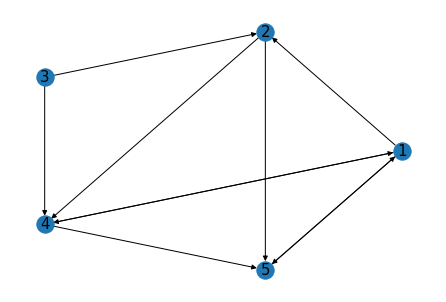

In [ ]:
# Нарисуем граф (у каждой вершины есть петля)

G = nx.from_numpy_matrix(A_pg, create_using=nx.MultiDiGraph())
pos = nx.circular_layout(G)
nx.draw_circular(G)
labels = {i : i + 1 for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels, font_size=15)
plt.show()

## Задание 6

Для указанной ниже матрицы найти число Перрона-Фробениуса и соответствующий собственный вектор с неотрицательными компонентами такой, что его евклидова норма равна единице. Выяснить, является ли матрица продуктивной. Число Перрона-Фробениуса необходимо найти итерационным методом.

\begin{align*}
    A =
    \begin{pmatrix} 
        0.9 & 0.35 & 0.2 \\
        0.35 & 0.5 & 0.35 \\
        0.2 & 0.35 & 0.2
    \end{pmatrix}
\end{align*}

### Решение

- Проверим, что матрица неразложима:

Проверим, что $(E + A)^{n-1} > 0$, где $n = 3$ - порядок матрицы

In [ ]:
A = np.array([[0.9, 0.35, 0.2],
              [0.35, 0.5, 0.35],
              [0.2, 0.35, 0.2]])

n = A.shape[0]

np.power(np.eye(n) + A, n-1)

array([[3.61  , 0.1225, 0.04  ],
       [0.1225, 2.25  , 0.1225],
       [0.04  , 0.1225, 1.44  ]])

Значит, по теореме Перрона-Фробениуса, требуемые собственное число и собственный вектор существуют

- Проверим, является ли матрица $A$ является нормальным оператором. В таком случае с помощью данного метода можно будет найти все собственные числа

In [ ]:
A

array([[0.9 , 0.35, 0.2 ],
       [0.35, 0.5 , 0.35],
       [0.2 , 0.35, 0.2 ]])

In [ ]:
A.T @ A

array([[0.9725, 0.56  , 0.3425],
       [0.56  , 0.495 , 0.315 ],
       [0.3425, 0.315 , 0.2025]])

In [ ]:
A @ A.T

array([[0.9725, 0.56  , 0.3425],
       [0.56  , 0.495 , 0.315 ],
       [0.3425, 0.315 , 0.2025]])

In [ ]:
if np.allclose(A.T @ A, A @ A.T):
    print('Матрица A является нормальным оператором')

Матрица A является нормальным оператором


- Найдем собственное значение методом итераций

*   Новый пункт
*   Новый пункт



In [ ]:
A = np.array([[0.9, 0.35, 0.2],
              [0.35, 0.5, 0.35],
              [0.2, 0.35, 0.2]])

v = np.ones(3) # берём вектор (1, 1, 1)

for i in range(3):
    print(f'№ {i + 1}')
    for j in range(200): # делаем 200 итераций
        u = A @ v
        v = u / np.linalg.norm(u)

    # наибольшее собственное значение
    l_max = (v.T @ A @ v) / (v.T @ v)
    print(f'Собственное значение: {l_max}')
    print(f'Собственный вектор: {v}')

    # вычитаем матрицу ранга 1 с наибольшим собственным значением и соответствующим собственным вектором
    A -= (l_max / (v @ v)) * np.outer(v, v) 

    print("\n Новая матрица")
    print(A)
    print("\n")

№ 1
Собственное значение: 1.2268041292725258
Собственный вектор: [0.77656761 0.53454871 0.33346727]

 Новая матрица
[[ 0.16016687 -0.15926261 -0.11769305]
 [-0.15926261  0.14945014  0.13131664]
 [-0.11769305  0.13131664  0.06357886]]


№ 2
Собственное значение: 0.40490282472247413
Собственный вектор: [-0.62902182  0.62782704  0.45843731]

 Новая матрица
[[-4.04040907e-05  6.40363525e-04 -9.32412307e-04]
 [ 6.40363525e-04 -1.01491071e-02  1.47777817e-02]
 [-9.32412307e-04  1.47777817e-02 -2.15174428e-02]]


№ 3
Собственное значение: -0.03170695399500003
Собственный вектор: [ 0.0356973  -0.56576575  0.82379294]

 Новая матрица
[[7.88689318e-17 1.47451495e-17 6.61363325e-18]
 [1.47451495e-17 1.02348685e-16 7.45931095e-17]
 [6.61363325e-18 7.45931095e-17 4.51028104e-17]]




Мы получили, что число Перрона-Фробениуса $\lambda_A \approx 1.2268$, а соответсвующий собственный вектор с неотрицательными компонентами $x_{A} = [0.78, 0.53, 0.33]^T$. Проверим, чему равна его евклидова норма

In [ ]:
x_A = np.array([0.78, 0.53, 0.33])

np.linalg.norm(x_A)

0.9990995946350895

- Проверим продуктивность матрицы $A$

Продуктивность матрицы $A$ равнозначна следующим условиям:

\begin{cases}
    (E - A) - обратима \\
    (E - A)^{-1} \geq 0
\end{cases}

In [ ]:
A = np.array([[0.9, 0.35, 0.2],
              [0.35, 0.5, 0.35],
              [0.2, 0.35, 0.2]])

n = A.shape[0]

E = np.eye(n)

E_A = Matrix(E - A)
E_A_inv = E_A.inv()

E_A_inv

Matrix([
[-1.99281867145422,  -2.51346499102334,  -1.59784560143627],
[-2.51346499102334, -0.287253141831239, -0.754039497307001],
[-1.59784560143627, -0.754039497307002,   0.52064631956912]])

### Ответ

$\lambda_A \approx 1.2268$

$x_{A} = [0.78, 0.53, 0.33]^T$

матрица $A$ непродуктивна

## Задание 7

Рассмотрим национальную экономику, производственные процессы в которой разукрупнены до уровня трех секторов (отраслей) производства. Мы анализируем переток продуктов (товаров, услуг) между этими отраслями. Каждая отрасль производит только один тип продукта. Кроме того, соблюдается постоянство удельного выпуска при постоянных пропорциях затрат независимо от масштабов производства. Информация о промежуточных затратах (продажи отраслей друг другу) и валовом выпуске представлена в таблице ниже.

| | Agriculture | Manufacturing | Services | Total Output |
| --: | --: | --: | --: | --: |
| Agriculture | 253 | 208 | 181 | 968 |
| Manufacturing | 174 | 82 | 145 | 1020 |
| Services | 239 | 263 | 213 | 915 |

Найти вектор конечного спроса. Построить матрицу расходных (технологических) коэффициентов. Вычислить леонтьевскую обратную для данной экономики. Выяснить, является ли модель Леонтьева, представленная в данной задаче, продуктивной.

### Решение

\begin{align*}
    P =
    \begin{pmatrix} 
        253 & 208 & 181 \\
        174 & 82 & 145 \\
        239 & 263 & 213
    \end{pmatrix};
    b = 
    \begin{pmatrix}
    968 \\
    1020 \\
    915    
    \end{pmatrix}
\end{align*}


- Конечный спрос

то, что останется от полного производства после всех издержек: $F = b - P \cdot [1, 1, 1]^T$

- Матрица расходных коэффициентов

$ C = (P_{ij} / b_i) $

- Леонтьевская матрица

$L = (E - C)^{-1}$

- Продуктивность леонтьевской матрицы

$(E - L)$ обратима и $(E - L)^{-1} \geq 0$


In [ ]:
P = np.array([[253, 208, 181],
              [174, 82, 145],
              [239, 263, 213]])

b = np.array([968, 1020, 915])

ones = np.ones_like(b)

In [ ]:
F = b - np.dot(P, ones)

F

array([326, 619, 200])

In [ ]:
C = np.array([P[i] / b[i] for i in range(b.shape[0])])

C

array([[0.2614, 0.2149, 0.187 ],
       [0.1706, 0.0804, 0.1422],
       [0.2612, 0.2874, 0.2328]])

In [ ]:
L = np.linalg.inv(np.eye(P.shape[0]) - C)

L

array([[1.6585, 0.5455, 0.5053],
       [0.4192, 1.2921, 0.3416],
       [0.7217, 0.6698, 1.6034]])

In [ ]:
inv = np.linalg.inv(np.eye(L.shape[0]) - L)

inv

array([[-19.1237,   3.3845,  14.0973],
       [ -2.3435,  11.9055,  -4.7773],
       [ 25.4738, -17.2632, -13.2151]])

### Ответ:

- Конечный спрос: $F = [326, 619, 200]^T$

- Матрица расходных коэффициентов: 
\begin{align*}
    C =
    \begin{pmatrix} 
        0.2614 & 0.2149 & 0.187 \\
        0.1706 & 0.0804 & 0.1422 \\
        0.2612 & 0.2874 & 0.2328
    \end{pmatrix}
\end{align*}

- Леонтьевская матрица:
\begin{align*}
    L =
    \begin{pmatrix}        
        1.6585 & 0.5455 & 0.5053 \\
        0.4192 & 1.2921 & 0.3416 \\
        0.7217 & 0.6698 & 1.6034  
    \end{pmatrix}
\end{align*}

- Продуктивность леонтьевской модели - отсутсвует:
\begin{align*}
    (E - L)^{-1} = 
    \begin{pmatrix}
       -19.1237 & 3.3845 & 14.0973 \\
       -2.3435 & 11.9055 & -4.7773 \\
       25.4738 & -17.2632 & -13.2151
    \end{pmatrix}
\end{align*}

## Задание 8

Найти значение $f(A)$ функции $f(x) = e^{x+3}$, где

\begin{align*}
    A =
    \begin{pmatrix} 
        3 & 9 & -5 \\
        1 & 15 & -7 \\
        2 & 22 & -10
    \end{pmatrix}
\end{align*}

### Решение

Воспользуемся тем, что $f(A) = C \cdot f(J) \cdot C^{-1}$, где $J$ - жорданова нормальная форма матрицы $A$

- Найдем $J, C, C^{-1}$

In [ ]:
A = np.array([[3, 9, -5],
              [1, 15, -7],
              [2, 22, -10]])

m = Matrix(A)

C, J = m.jordan_form()

C_inv = C.inv()

In [ ]:
J

Matrix([
[2, 1, 0],
[0, 2, 0],
[0, 0, 4]])

In [ ]:
C

Matrix([
[1, 1, 2/5],
[1, 0, 3/5],
[2, 0,   1]])

In [ ]:
C_inv

Matrix([
[0, -5,  3],
[1,  1, -1],
[0, 10, -5]])

Имеем

\begin{align*}
    J =
    \begin{pmatrix} 
        J_1 & 0 \\
        0 & J_2
    \end{pmatrix}
\end{align*}

\begin{align*}
где:
\end{align*}

\begin{align*}
    J_1 =
    \begin{pmatrix} 
        2 & 1 \\
        0 & 2
    \end{pmatrix}, \lambda_1 = 2
\end{align*}

\begin{align*} 
    J_2 =
    \begin{pmatrix} 
        4
    \end{pmatrix}, \lambda_2 = 4
\end{align*}

Значит 

\begin{align*}
    f(J) =
    \begin{pmatrix} 
        f(J_1) & 0 \\
        0 & f(J_2)
    \end{pmatrix}
\end{align*}

- Вычислим $f(J_1)$ и $f(J_2)$:

\begin{align*}
    f(J_1) =
    \begin{pmatrix} 
        f(\lambda_1) & \frac{f^{(1)}(\lambda_1)}{1!} \\
        0 & f(\lambda_1)
    \end{pmatrix} = 
    \begin{pmatrix} 
        e^{(2 + 3)} & e^{(2 + 3)} \\
        0 & e^{(2 + 3)}
    \end{pmatrix} = 
    \begin{pmatrix} 
        e^5 & e^5 \\
        0 & e^5
    \end{pmatrix}
\end{align*}

\begin{align*}
    f(J_2) =
    \begin{pmatrix} 
        f(\lambda_2)
    \end{pmatrix} = 
    \begin{pmatrix} 
        e^{4 + 3}
    \end{pmatrix} = 
    \begin{pmatrix} 
        e^7
    \end{pmatrix}
\end{align*}

Значит 

\begin{align*}
    f(J) =
    \begin{pmatrix} 
        e^5 & e^5 & 0 \\
        0 & e^5 & 0 \\
        0 & 0 & e^7 \\
    \end{pmatrix}
\end{align*}

\begin{align*}
    f(A) = C \cdot f(A) \cdot C^{-1} = 
    \begin{pmatrix} 
        1 & 1 & \frac{2}{5} \\
        1 & 0 & \frac{3}{5} \\
        2 & 0 & 1
    \end{pmatrix}
    \begin{pmatrix} 
        e^5 & e^5 & 0 \\
        0 & e^5 & 0 \\
        0 & 0 & e^7
    \end{pmatrix}
    \begin{pmatrix} 
        0 & -5 & 3 \\
        1 & 1 & -1 \\
        0 & 10 & -5
    \end{pmatrix}
\end{align*}

\begin{align*}
    f(A) =
    \begin{pmatrix} 
        2e^5 & -3e^5 + 4e^7 & e^5 - 2e^7 \\
        e^5 & -4e^5 + 6e^7 & 2e^5 - 3e^7 \\
        2e^5 & -8e^5 + 10e^7 & 4e^5 - 5e^7 \\
    \end{pmatrix}
\end{align*}

In [ ]:
### символьно вычисленная матрица
f_A_true = np.array([[2*np.exp(5), -3*np.exp(5) + 4*np.exp(7), np.exp(5) - 2*np.exp(7)],
                     [np.exp(5), -4*np.exp(5) + 6*np.exp(7), 2*np.exp(5) - 3*np.exp(7)],
                     [2*np.exp(5), -8*np.exp(5) + 10*np.exp(7), 4*np.exp(5) - 5*np.exp(7)]])

f_A_true = Matrix(f_A_true)

### проверка
f_J = np.array([[np.exp(5), np.exp(5), 0],
                [0, np.exp(5), 0],
                [0, 0, np.exp(7)]])

f_J = Matrix(f_J)

f_A = C * f_J * C_inv

In [ ]:
f_A

Matrix([
[296.826318205153,  3941.2931564061, -2044.85315775434],
[148.413159102577, 5986.14631416044, -2993.07315708022],
[296.826318205153, 9779.02631146397, -4889.51315573199]])

In [ ]:
f_A_true

Matrix([
[296.826318205153,  3941.2931564061, -2044.85315775434],
[148.413159102577, 5986.14631416044, -2993.07315708022],
[296.826318205153, 9779.02631146397, -4889.51315573199]])

- Проверим сходимость ряда:

Значением $f$ в точке $A$ называется матрица $B = f(A)$, если этот ряд сходится.

Условие сходимости $f(A)$:

$f(A)$ сходится, если $f(x)$ сходится для всех $x: |x| < \rho(A)$. Поскольку радиус сходимости экспоненты есть $inf$, то данное условие выполнено 

### Ответ

\begin{align*}
    f(A) =
    \begin{pmatrix} 
        2e^5 & -3e^5 + 4e^7 & e^5 - 2e^7 \\
        e^5 & -4e^5 + 6e^7 & 2e^5 - 3e^7 \\
        2e^5 & -8e^5 + 10e^7 & 4e^5 - 5e^7 \\
    \end{pmatrix}
\end{align*} 


## Задание 9

Решить задачу ЛП и найти “теневые цены”, отвечающие каждому ограничению.

\begin{align*}
    36x_1 + 102x_2 + 12x_3 → min;
\end{align*}

\begin{cases}
    −8x_1 + 10x_2 + 4x_3 ≥ 3 \\
    6x_1 + 3x_2 − 6x_3 ≥ 2 \\
    x_1 ≥ 0; x_2 ≥ 0; x_3 ≥ 0 
\end{cases}

- Запишем в стандартном виде


\begin{cases}
    c^T x → min \\
    Ax ≥ b \\
    x ≥ 0
\end{cases}

где 

\begin{align*}
    с = [36, 102, 12]^T
\end{align*}

\begin{align*}
    x = [x_1, x_2, x_3]^T
\end{align*}

\begin{align*}
    b = [3, 2]^T
\end{align*}

\begin{align*}
    A =
    \begin{pmatrix} 
        -8 & 10 & 4 \\
        6 & 3 & -6
    \end{pmatrix}
\end{align*} 


- Перейдем к двойственной задаче

\begin{cases}
    b^T y → max \\
    A^T y \leq c \\
    y ≥ 0
\end{cases}

где

\begin{align*}
    y = [y_1, y_2]^T
\end{align*}

Распишем подробно:

\begin{align*}
    3y_1 + 2y_2 → max;
\end{align*}

\begin{cases}
    −8y_1 + 6y_2 \leq 36 \\
    10y_1 + 3y_2 \leq 102 \\
    4y_1 - 6y_2 \leq 12 \\
    y_1 ≥ 0; y_2 ≥ 0 
\end{cases}

- Найдем допустимое множество решений

In [ ]:
y2_1 = lambda y1: 4 / 3 * y1 + 6
y2_2 = lambda y1: - 10 / 3 * y1 + 34
y2_3 = lambda y1: 2 / 3 * y1 - 2

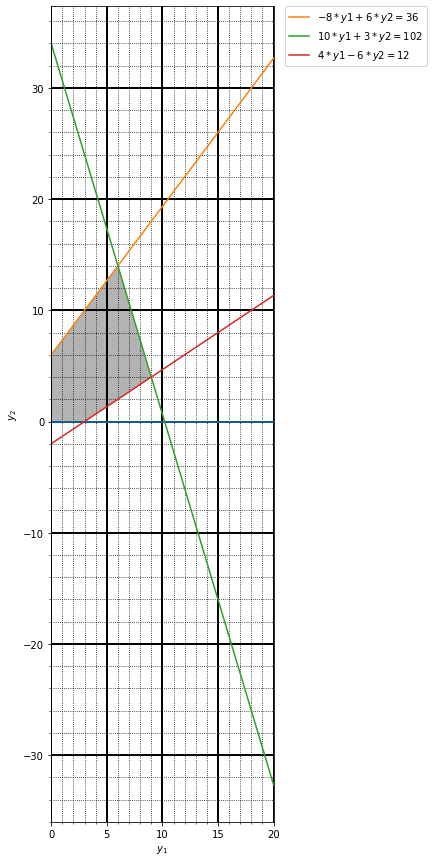

In [ ]:
d = np.linspace(0, 20, 1_000)
y1, y2 = np.meshgrid(d, d)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(((-8 * y1 + 6 * y2 <= 36) 
            & (10 * y1 + 3 * y2 <= 102) 
            & (4 * y1 - 6 * y2 <= 12)
            & (y1 >= 0) & (y2 >= 0)).astype(int), 
           extent=(y1.min(), y1.max(), y2.min(), y2.max()), 
           origin="lower", 
           cmap="Greys", 
           alpha=0.3);

y1 = np.linspace(0, 20, 1_000)
ax.plot(y1, np.zeros_like(y1))
ax.plot(y1, y2_1(y1), label=r"$-8 * y1 + 6 * y2 = 36$")
ax.plot(y1, y2_2(y1), label=r"$10 * y1 + 3 * y2 = 102$")
ax.plot(y1, y2_3(y1), label=r"$4 * y1 - 6 * y2 = 12$")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel(r"$y_1$")
ax.set_ylabel(r"$y_2$")

ax.minorticks_on()

ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.show()

Вершины многоугольника: $(0, 0), (0, 6), (3, 0), (6, 14), (9, 4)$. Максимум достигается в точке $(6, 14)$, он равен $46$

$ $

- Применяем теорему о дополняющей нежесткости: $x_j \cdot ((A^T y)_j - c_j) = 0$.
\begin{align*}
    \begin{cases}
        −8y_1 + 6y_2 = -48 + 84 = 36 \\
        10y_1 + 3y_2 = 60 + 42 = 102 \\
        4y_1 - 6y_2 = 24 - 84 = -60 < 12 \implies x_3 = 0 \\
        y_1 ≥ 0; y_2 ≥ 0 
    \end{cases}
\end{align*}

Подставляем x_3 = 0 в исходную задачу

\begin{align*}
    36x_1 + 102x_2 → min;
\end{align*}

\begin{cases}
    −8x_1 + 10x_2 ≥ 3 \\
    6x_1 + 3x_2 ≥ 2 \\
    x_1 ≥ 0; x_2 ≥ 0
\end{cases}

$ $

- Решим полученную систему:

In [ ]:
x2_1 = lambda x1: (8 / 10)*x1 + (3 / 10)
x2_2 = lambda x1: -2*x1 + (2 / 3)

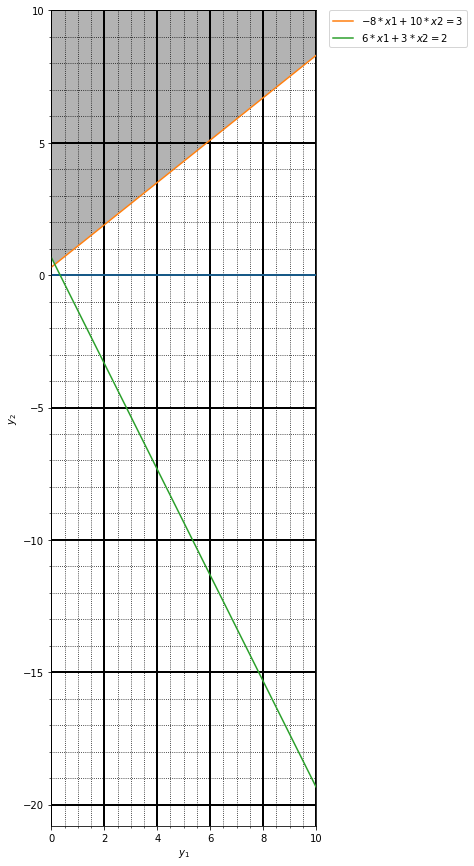

In [ ]:
d = np.linspace(0, 10, 1_000)
x1, x2 = np.meshgrid(d, d)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(((-8 * x1 + 10 * x2 >= 3) 
            & (6 * x1 + 3 * x2 >= 2) 
            & (x1 >= 0) & (x2 >= 0)).astype(int), 
           extent=(x1.min(), x1.max(), x2.min(), x2.max()), 
           origin="lower", 
           cmap="Greys", 
           alpha=0.3);

x1 = np.linspace(0, 10, 1_000)
ax.plot(x1, np.zeros_like(x1))
ax.plot(x1, x2_1(x1), label=r"$-8 * x1 + 10 * x2 = 3$")
ax.plot(x1, x2_2(x1), label=r"$6 * x1 + 3 * x2 = 2$")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.set_xlabel(r"$y_1$")
ax.set_ylabel(r"$y_2$")

ax.minorticks_on()

ax.grid(which='major',
        color = 'k', 
        linewidth = 2)

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

plt.show()

Точка персечения прямых: $\left(\frac{11}{84}, \frac{17}{42}\right)$ - в ней достигается минимум

Значит:

- Решение задачи линейного программирования: $\left(\frac{11}{84}, \frac{17}{42}, 0\right)$

- Теневые цены: $(6, 14)$

In [ ]:
# Выполним проверку

c = [36, 102, 12]

# A = [[-8, 10, 4], [6, 3, -6]]
# b = [3, 2]

A = [[8, -10, -4], [-6, -3, 6]]
b = [-3, -2]

x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)

res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds, x2_bounds])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
res['x']

array([1.30952381e-01, 4.04761905e-01, 2.23108632e-10])

In [ ]:
res_true = np.array([11/84, 17/42, 0])

res_true

array([0.13095238, 0.4047619 , 0.        ])

In [ ]:
if np.allclose(res['x'], res_true):
    print("--- Ответы сходятся ---")

--- Ответы сходятся ---


### Ответ

Решение задачи линейного программирования: $\left(\frac{11}{84}, \frac{17}{42}, 0\right)$

 Теневые цены: $(6, 14)$

## Задание 10

Построить такую матричную норму на пространстве матриц второго порядка, что последовательность $A_n$ норм матриц сходится, где

\begin{align*}
    A = 
    \begin{pmatrix} 
        1.0 & 2.0 \\
        0.0 & -1.7
    \end{pmatrix}
\end{align*}

In [ ]:
### Решение